### Підготовка датасету

Мій датасет - результат аналізу найкращих пісень за 2010-2019 роки на платформі Spotify.Кількість стовпців - 14.

Стовпці датасету представляють такі характеристики пісні:

title — назва;

artist — ім'я виконавця;

top genre - назва жанру;

year - рік випуску;

bpm - (beats per minute) темп;

nrgy - коефіцієнт енергійності (чим вище значення, тим пісня енергічніша);

dnce - коефіцієнт можливості танцювання (чим вище значення, тим легше під неї танцювати);

dB - гучність (чим вище значення, тим пісня гучніша);

live - коефіцієнт живого запису (чим вище значення, тим більша імовірність, що трек записувався із живими інструментами);

val - мотив (чим вище значення, тим веселіший мотив);

dur - тривалість (в секундах);

acous - акустичність (чим вище значення, тим менше відлуння);

spch - коефіцієнт розмовності (чим вище значення, тим більше слів різноманітних слів було використано);

pop - коефіцієнт популярності (чим вище значення, тим більша популярність).

P.S. Значення визначене як коефіцієнт має можливий діапазон значень від 0 до 100.

In [1]:
# Датасет взято із https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/AlexRedchuk/csvSharing/master/top10s.csv"

df = pd.read_csv(url, encoding='cp1252')
df.drop('Unnamed: 0', inplace=True, axis=1)

df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [2]:
sub_df = df[df.groupby('top genre')['top genre'].transform('count')>30].copy() 
sub_df['top genre'].value_counts()

dance pop       327
pop              60
canadian pop     34
Name: top genre, dtype: int64

### Нормалізація

In [3]:
import pandas as pd
from sklearn import preprocessing

df_normalized = sub_df.copy()
non_categorial_fields = ['bpm', 'nrgy',	'dnce',	'dB',	'live',	'val',	'dur',	'acous',	'spch',	'pop']
x = sub_df[non_categorial_fields].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized[non_categorial_fields] = x_scaled
df_normalized

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
2,TiK ToK,Kesha,dance pop,2010,0.484277,0.835616,0.716216,0.9,0.375000,0.712766,0.227586,0.108696,0.244444,0.808081
3,Bad Romance,Lady Gaga,dance pop,2010,0.477987,0.945205,0.635135,0.8,0.083333,0.712766,0.555172,0.000000,0.022222,0.797980
4,Just the Way You Are,Bruno Mars,pop,2010,0.415094,0.835616,0.554054,0.7,0.097222,0.414894,0.300000,0.021739,0.022222,0.787879
5,Baby,Justin Bieber,canadian pop,2010,0.138365,0.863014,0.675676,0.7,0.125000,0.531915,0.275862,0.043478,0.244444,0.777778
6,Dynamite,Taio Cruz,dance pop,2010,0.484277,0.753425,0.702703,0.8,0.027778,0.829787,0.237931,0.000000,0.133333,0.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Antisocial (with Travis Scott),Ed Sheeran,pop,2019,0.685535,0.808219,0.662162,0.7,0.472222,0.925532,0.096552,0.141304,0.044444,0.787879
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,0.383648,0.589041,0.513514,0.5,0.250000,0.127660,0.144828,0.010870,0.000000,0.757576
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,0.327044,0.767123,0.702703,0.6,0.069444,0.606383,0.248276,0.228261,0.200000,0.757576
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,0.584906,0.726027,0.405405,0.7,0.097222,0.648936,0.434483,0.076087,0.688889,0.707071


P.S. Робота із пропущеними значеннями не потрібна, адже в мене пропущені такі дані

### Розподіл на навчальні та тестові дані

In [4]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

X = df_normalized[non_categorial_fields] # Features
y = df_normalized['top genre'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
import pandas as pd  
import numpy as np  
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

In [6]:
#import seaborn as sns
#sns.pairplot(df_normalized,hue='top genre',palette='Dark2')

In [13]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7410071942446043


### Графічне зображення

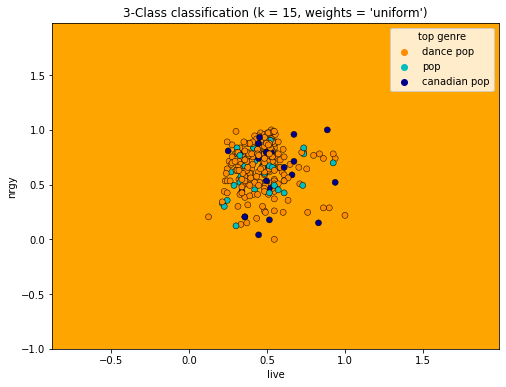

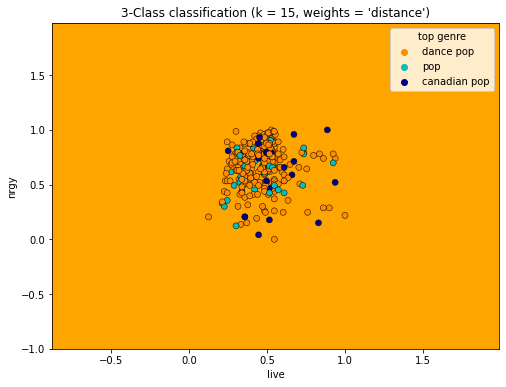

In [8]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']
n_neighbors = 15
y2 = y.astype('category')
y2 = y2.cat.codes
y2 = y2.astype(float)

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y2)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Xpred = np.array([xx.ravel(), yy.ravel()] + [np.repeat(0, xx.ravel().size) for _ in range(8)]).T
    Z = clf.predict(Xpred)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X_train.iloc[:, 0], y=X.iloc[:, 1], hue=y,
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel('live')
    plt.ylabel('nrgy')

plt.show()

### Пошук оптимальних параметрів

#### Розширив діапазон роботи пошуку оптимальних параметрів

In [9]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', 
KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': np.arange(1,30)}
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, refit=True,
verbose=1 )
knn_grid.fit(X_train, y_train)
knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 29 candidates, totalling 145 fits


({'knn__n_neighbors': 9}, 0.7979323308270677)

In [14]:
knn_grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             verbose=1)

### Затсосування оптимальних параметрів

In [10]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7266187050359713


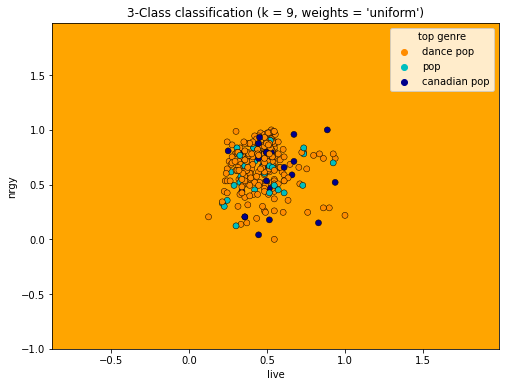

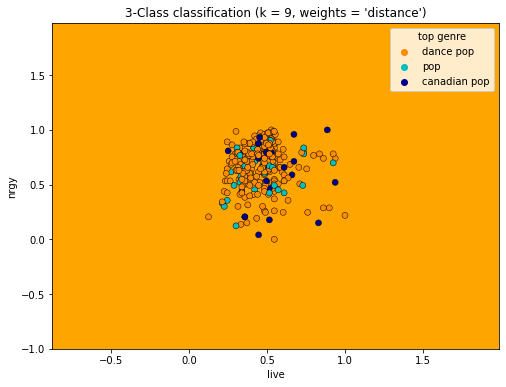

In [11]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']
n_neighbors = 9
y2 = y.astype('category')
y2 = y2.cat.codes
y2 = y2.astype(float)

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y2)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Xpred = np.array([xx.ravel(), yy.ravel()] + [np.repeat(0, xx.ravel().size) for _ in range(8)]).T
    Z = clf.predict(Xpred)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X_train.iloc[:, 0], y=X.iloc[:, 1], hue=y,
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel('live')
    plt.ylabel('nrgy')

plt.show()

In [12]:
grid_predictions = knn_grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[  0  10   0]
 [  0 101   2]
 [  0  26   0]]
              precision    recall  f1-score   support

canadian pop       0.00      0.00      0.00        10
   dance pop       0.74      0.98      0.84       103
         pop       0.00      0.00      0.00        26

    accuracy                           0.73       139
   macro avg       0.25      0.33      0.28       139
weighted avg       0.55      0.73      0.62       139



c:\users\sanya\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sanya\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sanya\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo